In [3]:
import pickle
from quippy.descriptors import Descriptor
from ase.io import read
import numpy as np
from sklearn.model_selection import train_test_split
#The Gaussian model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
# the KRR model
from sklearn.kernel_ridge import KernelRidge

from rdkit import Chem
from rdkit.Chem import AllChem

import sklearn
model = pickle.load(open('../MLmodels/XPS_GPR_C1s_new.pkl', 'rb'))


In [4]:
print(model)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01),
                         random_state=42)


In [6]:
Z = 6 # compute environment around atoms of a given Z. Here C atoms
descriptor = Descriptor("soap atom_sigma=0.5 n_max=3 l_max=3 cutoff=3.0 Z={:d} n_species=3 species_Z='1 6 8'".format(Z))


def smiles_to_xyz(smiles):
# smiles to mol
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    Chem.MolToMolFile(mol, 'temp.mol')    # Write RDKit molecule to a temporary file
    molecule = read('temp.mol') # Read the temporary file into ASE Atoms object
    return molecule

In [7]:
smiles = 'CC'
xyz = smiles_to_xyz(smiles)
print(xyz)

Atoms(symbols='C2H6', pbc=False)


In [8]:
def xyz_to_X(mol):
    elements = []
    if ("C" in mol.symbols) == True:
        descMol = descriptor.calc(mol) #descriptor for each molecule
        print(descMol['ci'])

        if 'data' in descMol:
           desc_data = descMol['data'] #get the data from the descriptor object if exist
           print(len(desc_data))
           for element in desc_data:
               elements.append(element)
    return elements
X = xyz_to_X(xyz)
print(X)

[1 2]
2
[array([ 3.96943617e-02,  1.51535261e-04,  8.50086701e-05,  4.16124780e-05,
        1.73420182e-01,  8.61631993e-03,  4.83360773e-03,  2.36609182e-03,
        3.78826593e-01,  2.44962685e-01,  1.37419887e-01,  6.72681701e-02,
       -1.70675900e-05, -4.15891408e-07, -1.71532215e-07, -1.59157773e-07,
       -5.27263878e-05, -1.67214145e-05, -6.89665607e-06, -6.39912210e-06,
        3.66931998e-09,  6.88283071e-10,  4.63856583e-10,  7.17424019e-10,
        2.02971958e-01,  5.71406625e-05,  4.12758412e-05,  2.45143369e-05,
        6.27035109e-01,  2.29740940e-03,  1.65954539e-03,  9.85628369e-04,
       -6.17112612e-05, -1.08367404e-07, -5.29935335e-08, -6.10866046e-08,
        5.18935359e-01,  1.08003574e-05,  1.00874943e-05,  7.36639739e-06,
        3.06800802e-02,  2.29740454e-03,  1.65954157e-03,  9.85626459e-04,
        9.47790406e-02,  9.23699261e-02,  6.67238868e-02,  3.96282960e-02,
       -9.32792127e-06, -4.35703322e-06, -2.13066456e-06, -2.45605557e-06,
        1.109299

In [9]:
y = model.predict(X)
print(y)

ValueError: X has 181 features, but GaussianProcessRegressor is expecting 621 features as input.

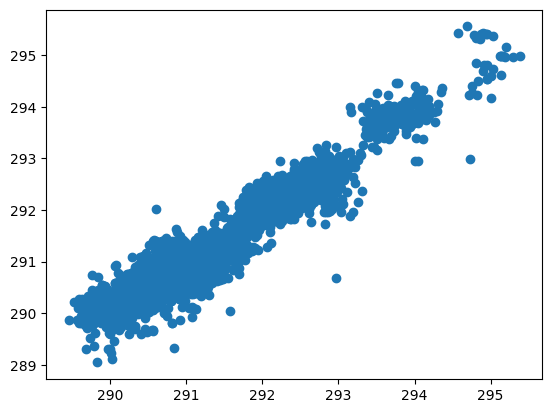

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y)
plt.show()

